Signalvergleich

* *WPS*: Derzeitige "Wind-Peak-Shaving" Operationalisierung im PE-Excel
* *RES*: Prognostizierte Residuallasten der jährlichen Szenarien
* (*AVG*: Rolling-Average Profile unterschiedlicher Herkunft (MA Nutz, Preissignale))


Die Signal-Analyse läuft für alle betrachteten Signale anhand folgender Schritte ab:
1. Normalisierung der Quelldaten auf einen *kontinuierlichen* Wertebereich von 0-1
    * WPS: Anhand der Nennleistung (bzw. der maximalen Leistung)
    * RES: Anhand der maximalen positiven Residuallast
    * (zu prüfen: AVG: Mittelwert - Maximalwert -> 0 - 1)
2. Diskretisierung auf zwei Werte: 0, 1 anhand eines **cut-off** Parameters
3. Darstellung der Signaleigenschaften
    * Verhältnis zwischen Zeiträumen von Signal / Nicht-Signal
    * Mittelwert und Verteilung der Signaldauer
    * Mittelwert und Verteilung der Dauer von Nicht-Signalen

In [1]:
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2
import sys
sys.path.append("..\\")
sys.path
import FLUCCOplus.transform as traffo
import FLUCCOplus.signals as fps
import FLUCCOplus.plots as fpp

FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


In [2]:
#Q: Magst du das Jahr und cut-off nicht gliech am Anfang definieren lassen? und dann wäre es für alle Signalvariante einmal gültig...

## PE-Excel
Signale aus der PE-Excel

In [3]:
### peexcel_normalized muss neu erstellt werden

In [4]:
source = fps.load_peexcel()

(<Figure size 1000x300 with 2 Axes>, <Axes: >)

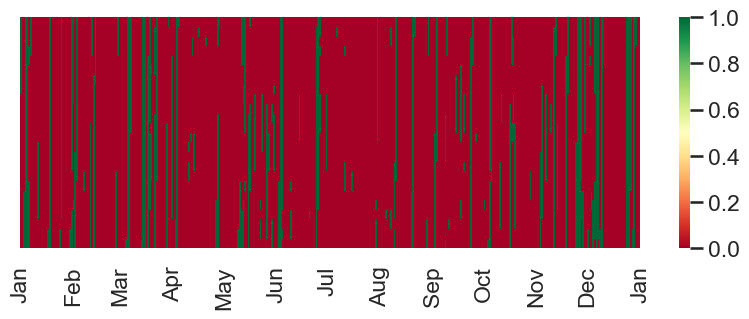

In [5]:
peexcel = traffo.normalize(source)
peexcel_dc = traffo.discretize(peexcel, separator=0.5, min=0., max=1.)
fpp.heatmap_figure(peexcel_dc["Wind 2013"], figsize=(10,3))

In [6]:
peexcel_signals = fps.signal_properties(peexcel_dc, separator=0.5)

## WEB Windsignale
Zweite Art von Signalen stellen die tatsächlich gemessenen Windprofile der W.E.B.

In [7]:
web = fps.load_web(2018)

In [8]:
web_dc = traffo.discretize(web, separator=0.5, min=0., max=1.)

(<Figure size 1200x600 with 12 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object))

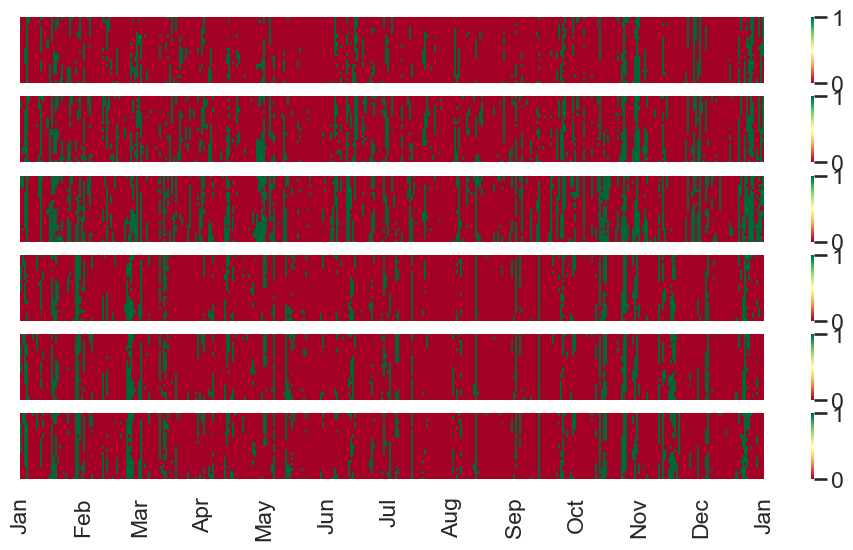

In [9]:
fpp.heatmap_figure(web_dc)

In [10]:
web_signals = fps.signal_properties(web_dc, separator=0.5)
web_signals

,Zeitraum mit Signal [h],Nicht-Signal-Zeitraum [h],Anzahl Signal-Perioden,Durchschnittliche Dauer Signal [h],Durchschnittliche Dauer Nicht-Signal [h]
Neuhof I,1162,7598,266.0,4.368421,28.56391
Neuhof III,1803,6957,364.0,4.953297,19.112637
Maustrenk,2293,6467,355.0,6.459155,18.216901
STERN I,1249,7511,249.0,5.016064,30.164659
STERN II,1330,7430,231.0,5.757576,32.164502
STERN III,1421,7339,254.0,5.594488,28.893701


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

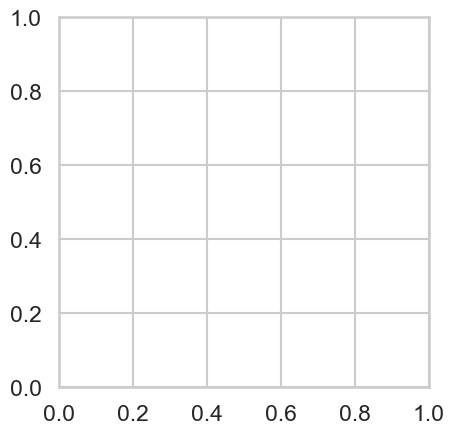

In [11]:
fpp.pie(web_dc["Neuhof III"], separator=0.5)

In [ ]:
# fpp.pie(web_dc, separator=0.5)  ## funktioniert iwie nicht!

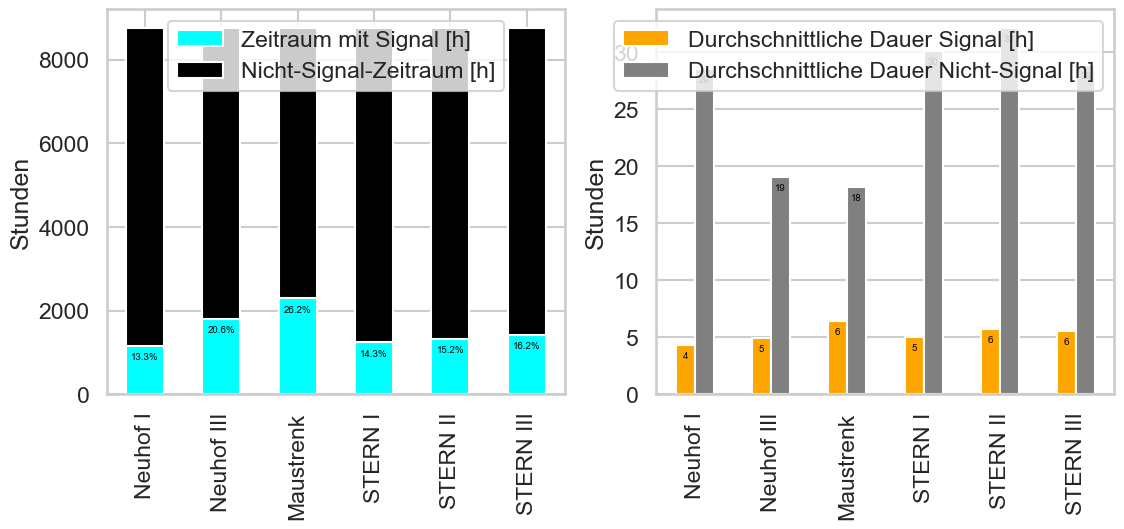

In [13]:
fig, ax = fpp.signal_bars(web_dc, 0.5, figsize=(13,5))

In [15]:
web_signals_s = fps.signal_properties_s(web_dc, separator=0.5)

TypeError: tuple indices must be integers or slices, not list

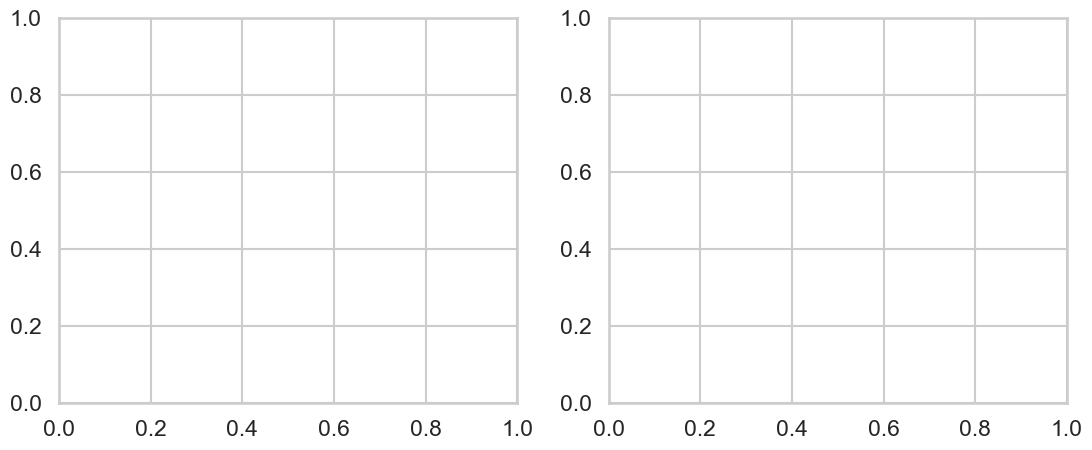

In [16]:
fig, ax = fpp.signal_bars_s(web_dc, 0.5, ytick_average_max=49, figsize=(13,5))

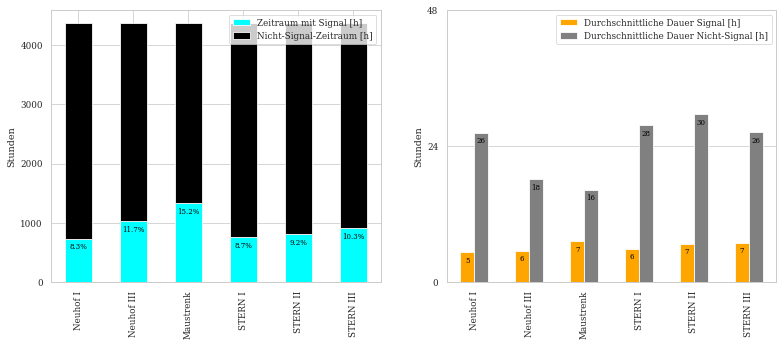

In [ ]:
fig, ax = fpp.signal_bars_w(web_dc, 0.5, ytick_average_max=49, figsize=(13,5))

## Spotprice
Eine dritte Art von Signalen stammen aus einer Spotpreise-Analyse

In [ ]:
spot = fps.load_spotprice(year=2018)

In [ ]:
spot_dc = traffo.discretize(spot, separator=0.5, min=0., max=1.)

(<Figure size 864x432 with 10 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>], dtype=object))

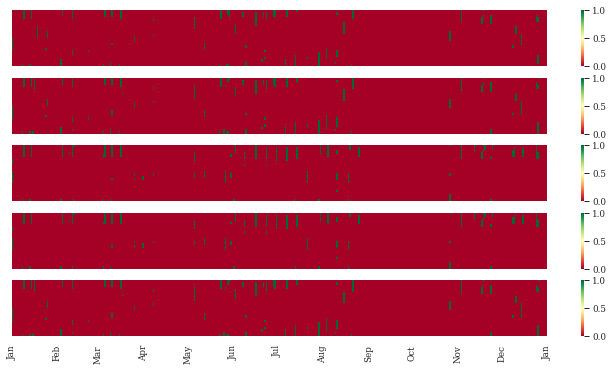

In [ ]:
fpp.heatmap_figure(spot_dc)

In [ ]:
spot_signals = fps.signal_properties(spot_dc, separator=0.5)

## PyPSA
Die letzte Art von Signalen stammen aus einer Masterarbeit, welche mithilfe PyPSA ...

In [ ]:
pypsa = fps.load_pypsa_avg(2018)

In [ ]:
pypsa_dc = traffo.discretize(pypsa, separator=0.5, min=0., max=1.) # das ist ja hier unnötig, da es schon 0,1 ist, oder??

(<Figure size 864x432 with 12 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

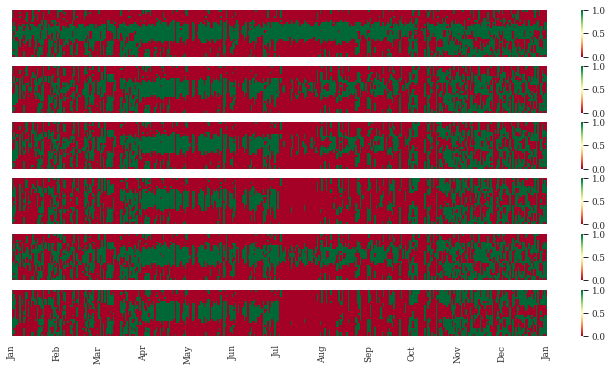

In [ ]:
fpp.heatmap_figure(pypsa_dc)

In [ ]:
pypsa_signals = fps.signal_properties_s(pypsa_dc, separator=0.5)


AttributeError: 'Index' object has no attribute 'month'